In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from scipy import stats
import exc_analysis.learning as lrn
import exc_analysis.plotting as excplt
import exc_analysis.kinematics as kin

mpl.style.use('mitch-exp')

In [2]:
ls trial_data

manual_mitch_1101_2319.csv    manual_orlando_1102_1413.csv
manual_mitch_1101_2333.csv    manual_orlando_1102_1418.csv
manual_mitch_1102_1814.csv    manual_shyam_1101_2012.csv
manual_mitch_1102_1819.csv    manual_shyam_1102_1824.csv
manual_orlando_1102_1405.csv


In [6]:
fname = 'manual_mitch_1102_1814.csv'

data = pd.read_csv('trial_data/' + fname)
data.set_index('Time', inplace=True)
data.head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms
Time,,,,,,,,
0.006066,7.4745,6.9645,7.614,7.4695,11.020000,10.538148,2.352051,0.0
0.077631,7.4745,6.9645,7.614,7.4695,10.984444,10.574074,2.352051,0.0
0.122279,7.4745,6.9645,7.614,7.4695,10.984444,10.538148,2.352051,0.0
0.197201,7.4745,6.9645,7.614,7.4695,11.020000,10.574074,2.352051,0.0
0.290016,7.4745,6.9645,7.614,7.4695,11.020000,10.574074,2.352051,0.0


In [7]:
dfs = [data]

In [9]:
# Compute velocity and store in dataframe
for i, df in enumerate(dfs):
    _, rate = lrn.compute_rate('trial_data/' + fname)
    rate = np.insert(rate, 0, np.zeros(4), axis=0)
    df['Boom Vel'] = rate[:, 0]
    df['Stick Vel'] = rate[:, 1]
    df['Bucket Vel'] = rate[:, 2]
    df['Swing Vel'] = rate[:, 3]

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,Bucket Vel,Swing Vel
Time,,,,,,,,,,,,
0.006066,7.4745,6.9645,7.614,7.4695,11.020000,10.538148,2.352051,0.0,0.000000,0.000000,0.000000,0.0
0.077631,7.4745,6.9645,7.614,7.4695,10.984444,10.574074,2.352051,0.0,0.056007,-0.063125,0.013963,0.0
0.122279,7.4745,6.9645,7.614,7.4695,10.984444,10.538148,2.352051,0.0,0.056007,-0.063125,0.013963,0.0
0.197201,7.4745,6.9645,7.614,7.4695,11.020000,10.574074,2.352051,0.0,0.050557,-0.055907,0.010778,0.0
0.290016,7.4745,6.9645,7.614,7.4695,11.020000,10.574074,2.352051,0.0,0.046070,-0.044755,0.004619,0.0


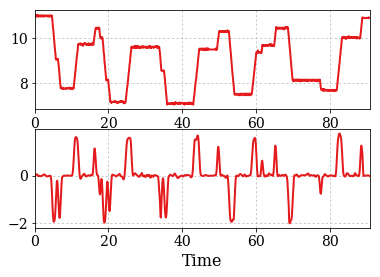

In [10]:
plt.figure()
plt.subplot(211)
dfs[0]['Boom Ms'].plot()

plt.subplot(212)
dfs[0]['Boom Vel'].plot()

In [11]:
lbls = []
thresholds = [0.2, 0.2, 0.2, 0.05]

for i, df in enumerate(dfs):
    lbls.append(np.zeros((len(df), 4)))
    
    for j in range(4):
        lbls[i][:, j] = lrn.get_action_primitives(df[excplt.labels[j] + ' Vel'].values,
                                                 thresholds[j])
    df['Boom Lbl'] = lbls[i][:, 0]
    df['Stick Lbl'] = lbls[i][:, 1]
    df['Bucket Lbl'] = lbls[i][:, 2]
    df['Swing Lbl'] = lbls[i][:, 3]

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,Bucket Vel,Swing Vel,Boom Lbl,Stick Lbl,Bucket Lbl,Swing Lbl
Time,,,,,,,,,,,,,,,,
0.006066,7.4745,6.9645,7.614,7.4695,11.020000,10.538148,2.352051,0.0,0.000000,0.000000,0.000000,0.0,2.0,2.0,2.0,2.0
0.077631,7.4745,6.9645,7.614,7.4695,10.984444,10.574074,2.352051,0.0,0.056007,-0.063125,0.013963,0.0,2.0,2.0,2.0,2.0
0.122279,7.4745,6.9645,7.614,7.4695,10.984444,10.538148,2.352051,0.0,0.056007,-0.063125,0.013963,0.0,2.0,2.0,2.0,2.0
0.197201,7.4745,6.9645,7.614,7.4695,11.020000,10.574074,2.352051,0.0,0.050557,-0.055907,0.010778,0.0,2.0,2.0,2.0,2.0
0.290016,7.4745,6.9645,7.614,7.4695,11.020000,10.574074,2.352051,0.0,0.046070,-0.044755,0.004619,0.0,2.0,2.0,2.0,2.0


In [309]:
reload(excplt)

<module 'exc_analysis.plotting' from '/Users/mitchallain/Development/Python/exc_analysis/exc_analysis/plotting.py'>

In [310]:
cmap = plt.get_cmap('viridis')
lc = [cmap.colors[0], cmap.colors[127], cmap.colors[255]]
lc

[[0.267004, 0.004874, 0.329415],
 [0.128729, 0.563265, 0.551229],
 [0.993248, 0.906157, 0.143936]]

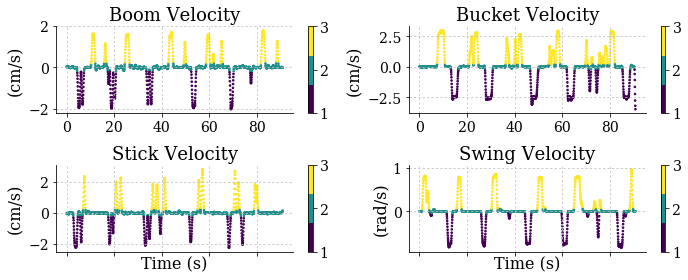

In [316]:
for df, lbl in zip(dfs, lbls):
    ax1, ax2, ax3, ax4 = excplt.plot_action_primitives(df, lbl, lc, s=10)
    
    for ax in [ax1, ax2, ax3]:
        ax.set_ylabel('(cm/s)')
    
    ax4.set_ylabel('(rad/s)')
    plt.tight_layout()
    plt.savefig('figs/action_class.pdf')
    

In [13]:
for df, lbl in zip(dfs, lbls):
    lbl_set = list(set([tuple(lb) for lb in lbl]))
    
    df['Action Class'] = (df[[l + ' Lbl' for l in excplt.labels]]
        .apply(lambda x: lbl_set.index(tuple(x)), axis=1))

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,Bucket Vel,Swing Vel,Boom Lbl,Stick Lbl,Bucket Lbl,Swing Lbl,Action Class
Time,,,,,,,,,,,,,,,,,
0.006066,7.4745,6.9645,7.614,7.4695,11.020000,10.538148,2.352051,0.0,0.000000,0.000000,0.000000,0.0,2.0,2.0,2.0,2.0,10
0.077631,7.4745,6.9645,7.614,7.4695,10.984444,10.574074,2.352051,0.0,0.056007,-0.063125,0.013963,0.0,2.0,2.0,2.0,2.0,10
0.122279,7.4745,6.9645,7.614,7.4695,10.984444,10.538148,2.352051,0.0,0.056007,-0.063125,0.013963,0.0,2.0,2.0,2.0,2.0,10
0.197201,7.4745,6.9645,7.614,7.4695,11.020000,10.574074,2.352051,0.0,0.050557,-0.055907,0.010778,0.0,2.0,2.0,2.0,2.0,10
0.290016,7.4745,6.9645,7.614,7.4695,11.020000,10.574074,2.352051,0.0,0.046070,-0.044755,0.004619,0.0,2.0,2.0,2.0,2.0,10


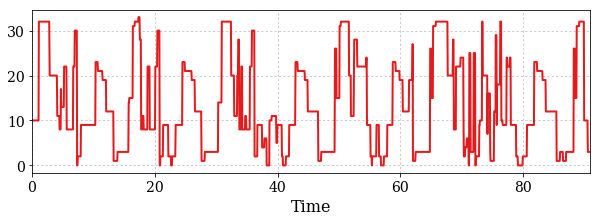

In [14]:
plt.figure(figsize=(10, 3))
dfs[0]['Action Class'].plot()

In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
for df in dfs:
    temp = kin.forward_kin_array(df[[l + ' Ms' for l in excplt.labels]]
                                 .values)
    df['X'] = temp[:, 0]
    df['Y'] = temp[:, 1]
    df['Z'] = temp[:, 2]

dfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,Bucket Vel,Swing Vel,Boom Lbl,Stick Lbl,Bucket Lbl,Swing Lbl,Action Class,X,Y,Z
Time,,,,,,,,,,,,,,,,,,,,
0.006066,7.4745,6.9645,7.614,7.4695,11.020000,10.538148,2.352051,0.0,0.000000,0.000000,0.000000,0.0,2.0,2.0,2.0,2.0,10,50.914665,0.0,26.684763
0.077631,7.4745,6.9645,7.614,7.4695,10.984444,10.574074,2.352051,0.0,0.056007,-0.063125,0.013963,0.0,2.0,2.0,2.0,2.0,10,50.821232,0.0,26.250695
0.122279,7.4745,6.9645,7.614,7.4695,10.984444,10.538148,2.352051,0.0,0.056007,-0.063125,0.013963,0.0,2.0,2.0,2.0,2.0,10,50.980337,0.0,26.355375
0.197201,7.4745,6.9645,7.614,7.4695,11.020000,10.574074,2.352051,0.0,0.050557,-0.055907,0.010778,0.0,2.0,2.0,2.0,2.0,10,50.756293,0.0,26.578975
0.290016,7.4745,6.9645,7.614,7.4695,11.020000,10.574074,2.352051,0.0,0.046070,-0.044755,0.004619,0.0,2.0,2.0,2.0,2.0,10,50.756293,0.0,26.578975


# Consolidate

In [17]:
cdfs = []

for df in dfs:
    idx = np.where(np.diff(df['Action Class']))[0] + 1
    cdfs.append(df.iloc[idx])

cdfs[0].head()

,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms,Boom Vel,Stick Vel,Bucket Vel,Swing Vel,Boom Lbl,Stick Lbl,Bucket Lbl,Swing Lbl,Action Class,X,Y,Z
Time,,,,,,,,,,,,,,,,,,,,
1.112431,7.474500,6.964500,7.614,7.469500,10.984444,10.538148,2.371026,0.000000,-0.010448,-0.023255,-0.029245,0.053796,2.0,2.0,2.0,3.0,32,50.943560,0.000000,26.330661
2.874049,7.474500,5.042118,7.614,7.469500,11.020000,10.538148,2.352051,1.117229,0.024410,-0.311819,-0.076119,0.406499,2.0,1.0,2.0,3.0,20,22.309536,45.766666,26.684763
4.111355,7.474500,4.993168,7.614,7.469500,11.020000,8.298750,2.333077,1.420589,-0.002478,-2.142705,0.027133,0.020509,2.0,1.0,2.0,2.0,11,8.843418,58.431267,34.202040
4.491593,6.232207,6.307659,7.614,6.914023,11.020000,7.598000,2.333077,1.414698,-0.259896,-1.057520,0.005223,-0.019077,1.0,1.0,2.0,2.0,8,9.487591,60.285285,36.840045
4.699902,5.047096,6.964500,7.614,7.469500,10.913333,7.598000,2.352051,1.413717,-0.918331,-0.265472,-0.007468,-0.061186,1.0,1.0,2.0,1.0,17,9.605105,60.644244,35.607682


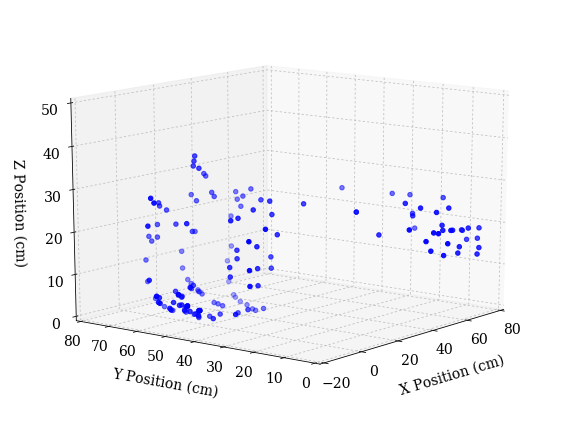

In [18]:
plt.figure(figsize=(8, 6))
excplt.plot_states_3d(cdfs[0], c='b')

plt.tight_layout()

## Quiver Plot

Test plot_quiver_3d

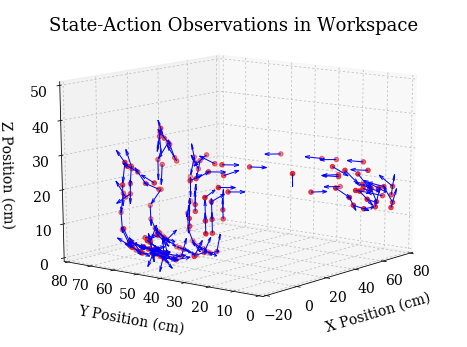

In [248]:
plt.figure(figsize=(8, 6))
excplt.plot_quiver_3d(cdfs[0], linewidth=1)
plt.savefig('figs/bnirl_dir/quiver.pdf')

# BNIRL

In [244]:
reload(excplt)

<module 'exc_analysis.plotting' from '/Users/mitchallain/Development/Python/exc_analysis/exc_analysis/plotting.py'>

In [124]:
eta = 1
alpha = 1

In [125]:
partitions = [0]*(len(cdfs[0]))
iters = 400
partition_dist = np.zeros((iters, len(cdfs[0])))
size = np.zeros((iters))

# Run BNIRL for _ iterations # eta works around 1e-7
for i in tqdm(range(iters)):
    partitions = lrn.bnirl_sampling_adir(
        cdfs[0][[lbl + ' Ms' for lbl in excplt.labels]].values, 
        cdfs[0][[lbl + ' Vel' for lbl in excplt.labels]].values, 
        partitions, verbose=False, eta=eta, alpha=alpha)
    partition_dist[i] = np.array(partitions)
    size[i] = (len(set(partitions)))

100%|██████████| 400/400 [00:36<00:00, 11.04it/s]


In [126]:
# Build up modes array with j^th posterior modes *after* i^th iteration
modes = np.zeros(partition_dist.shape)
# modes = np.zeros(len(states_condense))

# Discard iterations for burn-in
brn = 40

# Store mode for each state over Gibbs sampling sweeps up to i^th iteration
for j in tqdm(range(len(partition_dist))): # 0-200
    for i in range(partition_dist.shape[1]): # 0-161
        modes[j, i] = stats.mode(partition_dist[:j+1, i])[0][0]
        
# Set of final mode posteriors and counts array: (mode_num, count)
mode_set = set([int(mode) for mode in modes[-1]])
counts = [(mode, np.count_nonzero(modes[-1]==mode)) for mode in mode_set]

# Top six modes
modes_trim = [x[1] for x in sorted(counts, key=lambda x: x[1])[:-6:-1]]

# Sort by descending counts
sorted(counts, key=lambda x: x[1])[::-1]

100%|██████████| 400/400 [00:35<00:00,  7.18it/s]


[(0, 135), (76, 16), (58, 5), (16, 4)]

In [127]:
lrn.action_direction_likelihood(np.array([0, 0]), np.array([2, 3]), 
                               np.array([3, 1]), alpha=2)

0.65619612397439819

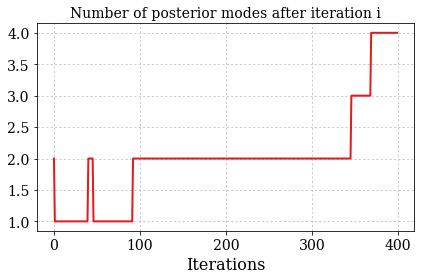

In [128]:
# Visualize number of posterior modes 
plt.figure()
plt.plot([len(set(mode)) for mode in modes])

plt.title('Number of posterior modes after iteration i', fontsize=14)
plt.xlabel('Iterations')

plt.tight_layout()

plt.savefig('figs/bnirl_dir/convergence.pdf')

In [129]:
colors = ['b', 'g', 'r', 'y', 'm', 'c']
mode_lookup = tuple(mode_set)
mode_lookup

(0, 16, 58, 76)

In [130]:
cs = []

for m in modes[-1]:
    cs.append(colors[mode_lookup.index(m)])

cs[:5]

['b', 'b', 'b', 'y', 'b']

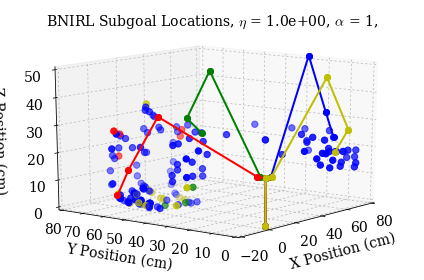

In [133]:
fig = plt.figure(figsize=(6, 4))
ax = fig.gca(projection='3d')

plt.title(r'BNIRL Subgoal Locations, $\eta$ = %.1e, $\alpha$ = %i, ' % (eta, alpha),
          family='serif', fontsize=14)
plt.xlabel('X Position (cm)', family='serif', labelpad=10, fontsize=14)
plt.ylabel('Y Position (cm)', family='serif', labelpad=10, fontsize=14)
ax.set_zlabel('Z Position (cm)', family='serif', labelpad=10, fontsize=14)
# plt.zlabel('z Position (cm)')

for j in mode_lookup:
    excplt.draw_exc(ax, cdfs[0][[lbl + ' Ms' for lbl in excplt.labels]].values[j], 
                    lw=2, c=colors[mode_lookup.index(j)])

ax.scatter(*np.split(cdfs[0][['X', 'Y', 'Z']].values, 3, axis=1), 
           s=40, c=cs)

excplt.orient_plot(ax)
plt.tight_layout()
plt.savefig('figs/bnirl_dir/bnirl_1_1.pdf', pad_inches=0.5)

____

In [160]:
from itertools import cycle

In [164]:
# wrap the whole thing in a big ole function
def bnirl_train(alpha, eta, num):
    ## CELL ONE
    partitions = [0]*(len(cdfs[0]))
    iters = 400
    partition_dist = np.zeros((iters, len(cdfs[0])))
    size = np.zeros((iters))

    # Run BNIRL for _ iterations # eta works around 1e-7
    for i in tqdm(range(iters)):
        partitions = lrn.bnirl_sampling_adir(
            cdfs[0][[lbl + ' Ms' for lbl in excplt.labels]].values, 
            cdfs[0][[lbl + ' Vel' for lbl in excplt.labels]].values, 
            partitions, verbose=False, eta=eta, alpha=alpha)
        partition_dist[i] = np.array(partitions)
        size[i] = (len(set(partitions)))
    
    ## CELL TWO
    # Build up modes array with j^th posterior modes *after* i^th iteration
    modes = np.zeros(partition_dist.shape)
    # modes = np.zeros(len(states_condense))

    # Discard iterations for burn-in
    brn = 40

    # Store mode for each state over Gibbs sampling sweeps up to i^th iteration
    for j in tqdm(range(len(partition_dist))): # 0-200
        for i in range(partition_dist.shape[1]): # 0-161
            modes[j, i] = stats.mode(partition_dist[:j+1, i])[0][0]

    # Set of final mode posteriors and counts array: (mode_num, count)
    mode_set = set([int(mode) for mode in modes[-1]])
    counts = [(mode, np.count_nonzero(modes[-1]==mode)) for mode in mode_set]

    # Top six modes
    modes_trim = [x[1] for x in sorted(counts, key=lambda x: x[1])[:-6:-1]]

    # Sort by descending counts
    sorted(counts, key=lambda x: x[1])[::-1]
    
    ## CELL THREE
    # Visualize number of posterior modes 
    plt.figure()
    plt.plot([len(set(mode)) for mode in modes])

    plt.title('Number of posterior modes after iteration i', fontsize=14)
    plt.xlabel('Iterations')

    plt.tight_layout()

    plt.savefig('figs/bnirl_dir/convergence_%i.pdf' % num)
    
    ## CELL FOUR
    colors = ['b', 'g', 'r', 'y', 'm', 'c']
    mode_lookup = tuple(mode_set)
    mode_lookup
    
    ## CELL FIVE
    cs = []

    for m in modes[-1]:
        cs.append(colors[mode_lookup.index(m) % 5])
    
    ## CELL SIX
    fig = plt.figure(figsize=(6, 4))
    ax = fig.gca(projection='3d')

    plt.title(r'BNIRL Subgoal Locations, $\eta$ = %.1e, $\alpha$ = %i, ' % (eta, alpha),
              family='serif', fontsize=14)
    plt.xlabel('X Position (cm)', family='serif', labelpad=10, fontsize=14)
    plt.ylabel('Y Position (cm)', family='serif', labelpad=10, fontsize=14)
    ax.set_zlabel('Z Position (cm)', family='serif', labelpad=10, fontsize=14)
    # plt.zlabel('z Position (cm)')

    for j in mode_lookup:
        excplt.draw_exc(ax, cdfs[0][[lbl + ' Ms' for lbl in excplt.labels]].values[j], 
                        lw=2, c=colors[mode_lookup.index(j) % 5])

    ax.scatter(*np.split(cdfs[0][['X', 'Y', 'Z']].values, 3, axis=1), 
               s=40, c=cs)

    excplt.orient_plot(ax)
    plt.tight_layout()
    plt.savefig('figs/bnirl_dir/bnirl_%i.pdf' % num, pad_inches=0.5)

    # CELL SEVEN
    return {'modes': modes, 'mode_set': mode_set,
                    'partitions': partitions}

100%|██████████| 400/400 [00:07<00:00, 55.71it/s]


Completed 0


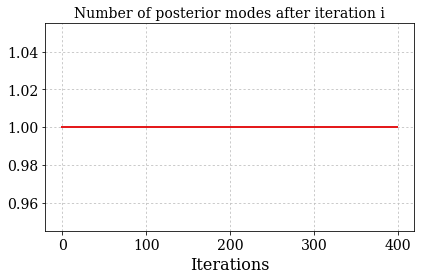

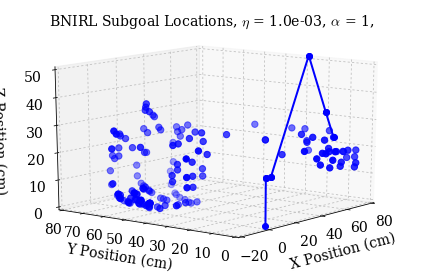

In [175]:
# results = []
trials = [(a, b) for a in [1, 3, 5] for b in [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]]
trials_end = [trials[0]]

for tr, (alpha, eta) in enumerate(trials_end):
    results.insert(0, bnirl_train(alpha, eta, (tr)))
    print('Completed %i' % (tr))

In [176]:
len(results)

18

In [177]:
# try to build grid of num subgoals vs parameters
alphas = [x[0] for x in trials]
etas = [x[1] for x in trials]
len(alphas), len(etas)

(18, 18)

In [185]:
num_sgs = [len(res['mode_set']) for res in results]
num_sgs

[1, 2, 2, 3, 1, 1, 2, 3, 4, 5, 3, 1, 2, 5, 6, 12, 10, 2]

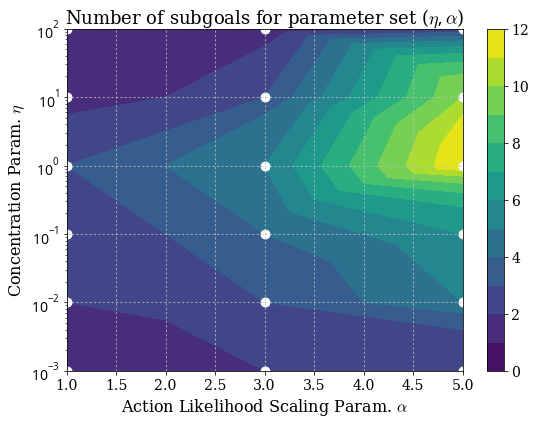

In [210]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_yscale("log", nonposy='clip')
plt.tricontourf(alphas, etas, num_sgs, range(13))
ax.scatter(alphas, etas, s=80, c='w')
ax.set_ybound(1e-3, 1e2)
ax.set_xbound(1, 5)

ttl = plt.title(r'Number of subgoals for parameter set ($\eta, \alpha$)')
# ttl.set_position([0.5, 1])
cbar = plt.colorbar()

plt.xlabel(r'Action Likelihood Scaling Param. $\alpha$')
plt.ylabel(r'Concentration Param. $\eta$')

plt.tight_layout()
plt.savefig('figs/bnirl_dir/parametric_bnirl.pdf')

In [211]:
# ^beautiful

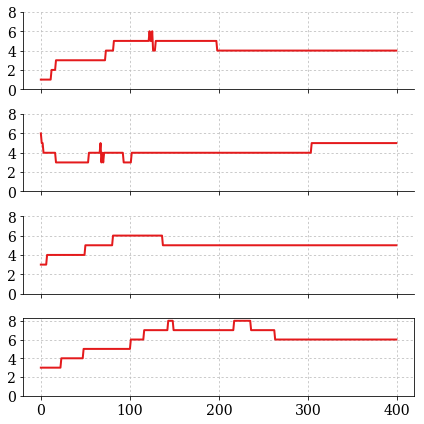

In [234]:
plt.figure(figsize=(6, 6))

x_ticks = np.arange(0, 401, 100)
y_ticks = np.arange(0, 9, 2)

ax4 = plt.subplot(414)
ax4.plot([len(set(mode)) for mode in results[14]['modes']])
ax4.set_xticks(x_ticks)                                                                                               
ax4.set_yticks(y_ticks)

for i, num in enumerate([8, 9, 13]):
    ax = plt.subplot(4, 1, i+1, sharex=ax4)
    ax.plot([len(set(mode)) for mode in results[num]['modes']])
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.set_xticks(x_ticks)                                                                                               
    ax.set_yticks(y_ticks)                                                       

plt.tight_layout()

In [235]:
import pickle

In [236]:
# save results for later
with open('bnirl_dir_results.pkl', 'wb') as savefile:
    pickle.dump(results, savefile)
